In [1]:
import math, scipy
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.read_excel('./UN.xlsx', sheet_name="Table 4")

Unnamed: 0                 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0          NaN                        NaN        NaN        NaN   
1          NaN                        NaN        NaN        NaN   
2          NaN                        NaN        NaN        NaN   
3          NaN                        NaN        NaN        NaN   
4          NaN                        NaN        NaN        NaN   
..         ...                        ...        ...        ...   
275        261                      Samoa        NaN        882   
276        262                    Tokelau        NaN        772   
277        263                      Tonga        NaN        776   
278        264                     Tuvalu        NaN        798   
279        265  Wallis and Futuna Islands        NaN        876   

              Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0                    NaN        NaN        NaN        NaN        NaN   
1                    NaN        NaN        NaN        NaN        NaN   
2                    NaN        NaN        NaN        NaN        NaN   
3         United Nations        NaN        NaN        NaN        NaN   
4    Population Division        NaN        NaN        NaN        NaN   
..                   ...        ...        ...        ...        ...   
275                    B  47.244564  47.784406  48.299433  48.833971   
276                    B  44.444444  44.736842  45.038168  48.449612   
277                    B  48.883545  47.525962  46.226927  45.873053   
278                    C  43.396226  43.726236  44.239631  44.808743   
279                    B  48.216833  48.869048  49.478908  49.513742   

     Unnamed: 9  Unnamed: 10  
0           NaN          NaN  
1           NaN          NaN  
2           NaN          NaN  
3           NaN          NaN  
4           NaN          NaN  
..          ...          ...  
275   49.355720    49.908704  
276   51.981352    52.156057  
277   45.698925    45.437096  
278   44.805195    44.680851  
279   49.531700    49.526150  

[280 rows x 11 columns]

In [4]:
#import original messy Table 4 and delete extra rows without data
    
col_names = ['Sort Order','Major Area, Region, Country or Area of Destination','Notes','Country Code','Type of Data','1990',
             '1995', '2000','2005', '2010', '2015']
df2=pd.read_excel('UN.xlsx', sheet_name= 'Table 4',skiprows=16,header=None,usecols=list(range(1,11)),names=col_names)
df2.head()

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data       1990       1995       2000       2005       2010  \
0          NaN   49.03915   49.16879  49.112244  48.832993  48.305660   
1          NaN  51.123977  51.149024  51.113307  51.171501  51.658932   
2          NaN  46.592099  46.500135  46.128444  45.134297  43.319780   
3          NaN  47.261155  47.571664  46.826689  45.157406  45.499573   
4          NaN  46.466684  46.279022  46.009598  45.130768  43.043672   

        2015  
0  48.249769  
1  51.866687  
2  43.327078  
3  45.942752  
4  42.984398

In [5]:
df2.dtypes

Major Area, Region, Country or Area of Destination     object
Notes                                                  object
Country Code                                            int64
Type of Data                                           object
1990                                                   object
1995                                                   object
2000                                                   object
2005                                                   object
2010                                                  float64
2015                                                  float64
dtype: object

In [6]:
#make a column for Female migrants as a percentage of the international migrant stock data and Year data
df3=pd.melt(df2,id_vars=['Major Area, Region, Country or Area of Destination',
                         'Notes','Country Code','Type of Data'],
            value_name='Female',
           var_name='Year')
df3.drop(columns=['Major Area, Region, Country or Area of Destination'],inplace=True)
df3.head(5)

Notes  Country Code Type of Data  Year     Female
0   NaN           900          NaN  1990   49.03915
1   (b)           901          NaN  1990  51.123977
2   (c)           902          NaN  1990  46.592099
3   (d)           941          NaN  1990  47.261155
4   NaN           934          NaN  1990  46.466684

In [7]:
df3.dtypes

Notes           object
Country Code     int64
Type of Data    object
Year            object
Female          object
dtype: object

In [8]:
df3[df3['Female']=='..']

Notes  Country Code Type of Data  Year Female
23    NaN           728          B R  1990     ..
162   NaN           499            B  1990     ..
190   NaN           531            B  1990     ..
203   NaN           534            B  1990     ..
288   NaN           728          B R  1995     ..
427   NaN           499            B  1995     ..
455   NaN           531            B  1995     ..
468   NaN           534            B  1995     ..
553   NaN           728          B R  2000     ..
692   NaN           499            B  2000     ..
720   NaN           531            B  2000     ..
733   NaN           534            B  2000     ..
818   NaN           728          B R  2005     ..
957   NaN           499            B  2005     ..
985   NaN           531            B  2005     ..

In [9]:
#select vals that do not = ".."
df3=df3[df3['Female']!='..']

In [10]:
list(df3['Female'].unique())[-10:]

[46.25762617859124,
 48.75086147484494,
 49.95183044315992,
 42.990218910107124,
 45.78096947935368,
 49.90870359099209,
 52.15605749486652,
 45.437096492758684,
 44.680851063829785,
 49.526149526149524]

In [11]:
import matplotlib.pyplot as plt

In [12]:
#Select regions
df_by_development = df3[df3['Country Code'].isin([901,902])]

In [13]:
df_by_development=df_by_development.sort_values(by=['Country Code','Year'])

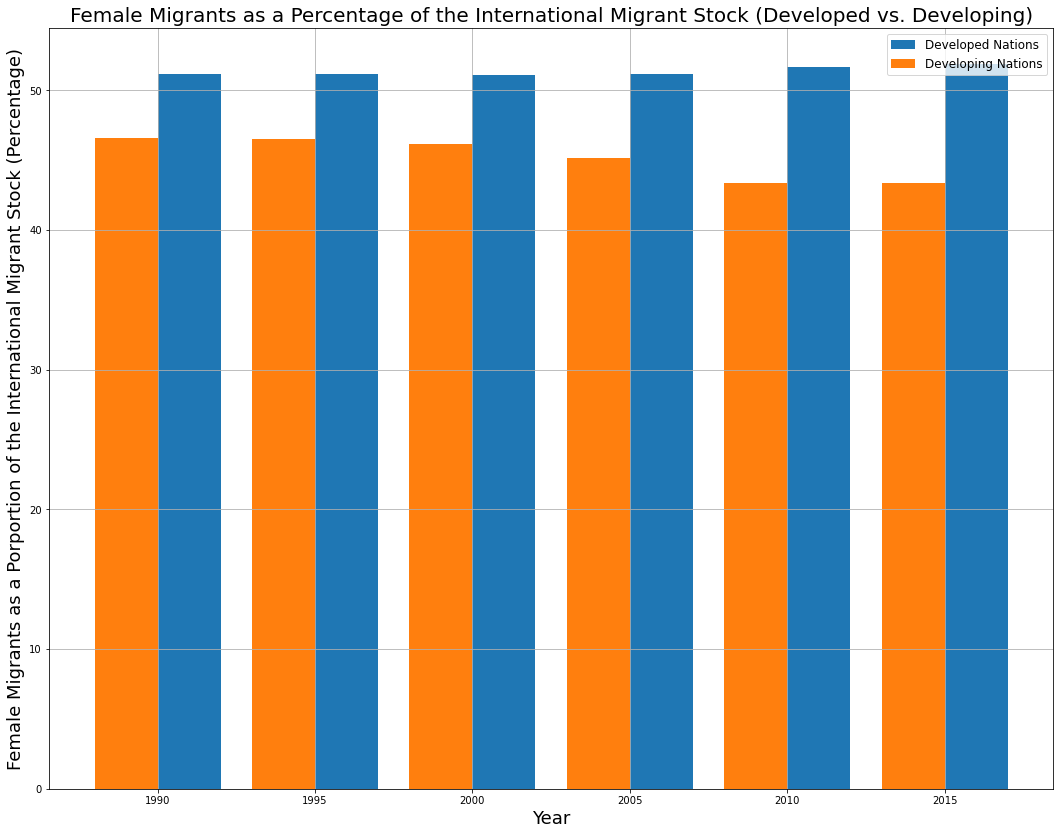

In [25]:
#create developed vs. developing graph
# create a figure and axis
fig, ax = plt.subplots()

# scatter male against female
x = df_by_development['Year'][:6].astype(int)
y1 = df_by_development[df_by_development['Country Code']==901]['Female'].values
y2 = df_by_development[df_by_development['Country Code']==902]['Female'].values
w = 1
rects1 = ax.bar(x+w, y1, width = 2, color='tab:blue', align='center')
rects2 = ax.bar(x-w, y2,  width = 2, color='tab:orange', align='center')

fig.set_size_inches(18, 14)


#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
ax.grid(True)
ax.set_title('Female Migrants as a Percentage of the International Migrant Stock (Developed vs. Developing)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Female Migrants as a Porportion of the International Migrant Stock (Percentage)', fontsize=18)
ax.legend( (rects1[0], rects2[0]), ('Developed Nations', 'Developing Nations'),fontsize=12 )

In [15]:
#select by region
df_by_region = df3[df3['Country Code'].isin([903,935,908,909,904, 905])]

In [16]:
df_by_region=df_by_region.sort_values(by=['Country Code','Year'])

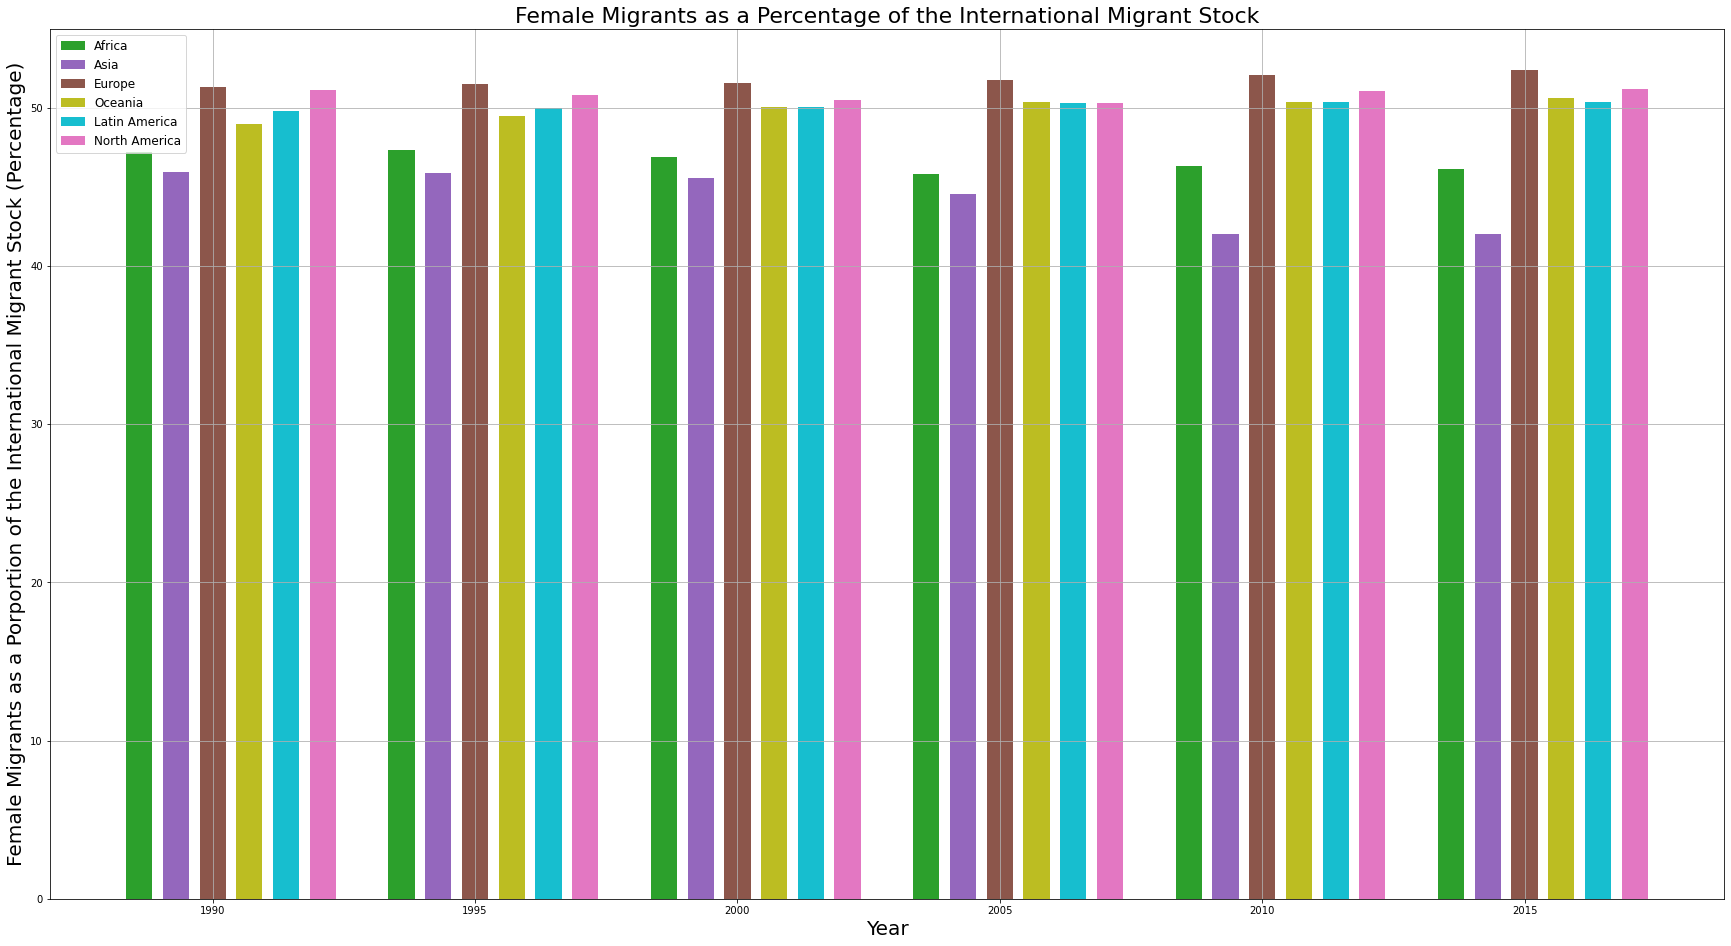

In [34]:
#create continental graph
# create a figure and axis
fig, ax = plt.subplots()


# scatter male against female
x = df_by_region['Year'][:6].astype(int)
#903,935,908,909,904, 905
y_africa = df_by_region[df_by_region['Country Code']==903]['Female'].values
y_asia = df_by_region[df_by_region['Country Code']==935]['Female'].values
y_europe = df_by_region[df_by_region['Country Code']==908]['Female'].values
y_oceanian = df_by_region[df_by_region['Country Code']==909]['Female'].values
y_latin = df_by_region[df_by_region['Country Code']==904]['Female'].values
y_north_america = df_by_region[df_by_region['Country Code']==905]['Female'].values
w = 0.7
rects1 = ax.bar(x-2*w, y_africa, width = 0.5, color='tab:green', align='center')
rects2 = ax.bar(x-w, y_asia,  width = 0.5, color='tab:purple', align='center')
rects3 = ax.bar(x, y_europe, width = 0.5, color='tab:brown', align='center')
rects4 = ax.bar(x+1*w, y_oceanian,  width = 0.5, color='tab:olive', align='center')
rects5 = ax.bar(x+2*w, y_latin, width = 0.5, color='tab:cyan', align='center')
rects6 = ax.bar(x+3*w, y_north_america,  width = 0.5, color='tab:pink', align='center')

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
fig.set_size_inches(30,16 )
ax.grid(True)
ax.set_title('Female Migrants as a Percentage of the International Migrant Stock', fontsize=22)
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Female Migrants as a Porportion of the International Migrant Stock (Percentage)', fontsize=20)
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]), ('Africa', 'Asia','Europe','Oceania', 'Latin America', 'North America'), fontsize=12 )